# Clustering wikibio

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
import pymongo
from collections import Counter, defaultdict

In [3]:
db = pymongo.MongoClient()['wikibio']['rawdata']
data = list(db.find({
    'subdata': 'train', 'box.occupation': {'$exists': True}
}))[:20000]

## Select by occupation

In [6]:
occupations = defaultdict(set)
for i, record in enumerate(data):
    occupation = record['box']['occupation']
    o = " ".join(occupation)
    for p in o.split(' , '):
        occupations[p].add(record['id'])
occupation_stats = pd.Series(dict([(k, len(v)) for k, v in occupations.items()]))
selected_occupations = occupation_stats.sort_values(ascending=False).head(50)
selected_documents = set()
for k in selected_occupations.keys():
    selected_documents = selected_documents.union(occupations[k])
docs = [" ".join(x['sentences']) for x in data if x['id'] in selected_documents]
docids = [x['id'] for x in data if x['id'] in selected_documents]

## Vectorize

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
tf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df=20)
X = tf_vectorizer.fit_transform(docs)

## Visualize with PCA

In [14]:
import matplotlib.pyplot as plt

In [15]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X.toarray())

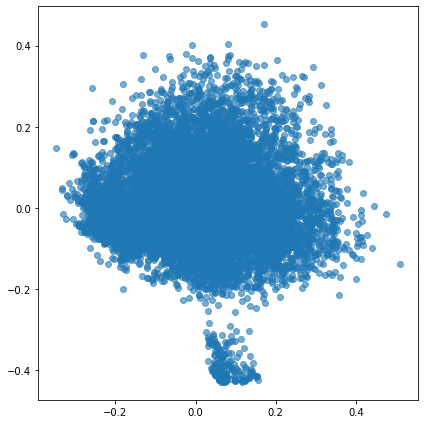

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X2[:,0], X2[:,1], alpha=.6)
plt.tight_layout()
plt.show()

## Clustering

In [19]:
pro = [x for x, y in occupations.items() if len(y) > 1]

In [20]:
len(pro)

1331

In [21]:
pro[:10]

['actress',
 'musician',
 'singer-songwriter',
 'businesswoman',
 'planter',
 'politician',
 'farmer',
 'bandleader',
 'composer',
 'arranger']